# Maximum Likelihood Estimate

Suppose we are given a problem where we can assume the _parametric class_ of distribution (e.g. Normal Distribution) that generates a set of data. Since this class of distribution has a finite number of parameters that need to be figured out (mean $\mu$ and standard deviation $\sigma$ in case of normal distribution) in order to identify the particular member of the class, we will use the given data to do so.

The obtained parameter estimates will be called **Maximum Likelihood Estimates**.

Let us consider a Random Variable $X$ to be normally distributed with some mena $\mu$ and standard deviation $\sigma$. We need to estimate $\mu$ and $\sigma$ using our samples which accurately represent the actual $X$ and not just the samples that we have drawn out.

## Estimating Parameters

Let's have a look at the Probability Density Function (PDF) for the Normal Distribution and see what they mean.

$$
\begin{equation}
f(x; \mu, \sigma) = \frac{e^{-(x - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}}
\end{equation}
$$ (eq_normal_dist)

This equation is used to obtain the probability of our sample $x$ being from our random variable $X$, when the true parameters of the distribution are $\mu$ and $\sigma$. Normal distributions with different $\mu$ and $\sigma$ are shown below.

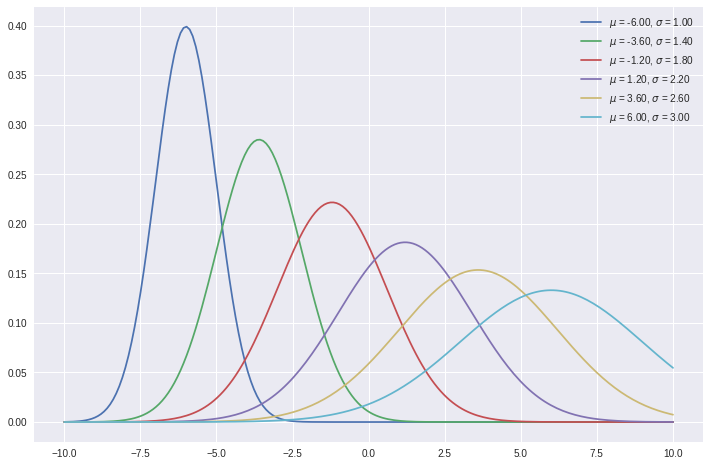

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(10)

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 8)

def plot_normal(x_range, mu=0, sigma=1, **kwargs):
    '''
    https://emredjan.github.io/blog/2017/07/19/plotting-distributions/
    '''
    x = x_range
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)
    
mus = np.linspace(-6, 6, 6)
sigmas = np.linspace(1, 3, 6)

assert len(mus) == len(sigmas)
x_range = np.linspace(-10, 10, 200)

for mu, sigma in zip(mus, sigmas):
    plot_normal(x_range, mu, sigma, label=f'$\mu$ = {mu:.2f}, $\sigma$ = {sigma:.2f}')
plt.legend();

Let us consider that our sample = 5. Then what is the probability that it comes from a normal distribution with $\mu = 4$ and $\sigma = 1$? To get this probability, we only need to plug in the values of $x, \mu$ and $\sigma$ in Equation {eq}`eq_normal_dist`. Scipy as a handy function [`norm.pdf()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) that we can use to obtain this easily.

In [2]:
from scipy.stats import norm

norm.pdf(5, 4, 1)

0.24197072451914337

What if our sample came from a different distribution with $\mu = 3$ and $\sigma = 2$?

In [3]:
norm.pdf(5, 3, 2)

0.12098536225957168

As we can see, the PDF equation {eq}`eq_normal_dist` shows us how likely our sample are from a distribution with certain parameters. Current results show that our sample is more likely to have come from the first distribution. But this with just a single sample. What if we had multiple samples and we wanted to estimate the parameters?

Let us assume we have multiple samples from $X$ which we assume to have come from some normal distribution. Also, all the samples are mutually independent of one another. In this case, the we can get the total probability of observing all samples by multiplying the probabilities of observing each sample individually.

E.g., The probability that both $7$ and $1$ are drawn from a normal distribution with $\mu = 4$ and $\sigma=2$ is equal to:

In [4]:
norm.pdf(7, 4, 2) * norm.pdf(1, 4, 2)

0.004193701896768355

## Likelihood of many samples


In [5]:
x_data = np.random.randint(-9, high=9, size=5)
print(x_data)

[ 0 -5  6 -9  8]


In maximum likelihood estimation (MLE), we specify a distribution of unknown parameters and then use our data to obtain the actual parameter values. In essence, MLE's aim is to find the set of parameters for the probability distribution that maximizes the likelihood of the data points. This can be formally expressed as:

$$
\begin{equation}
\hat{\mu}, \hat{\sigma} = \operatorname*{argmax}_{\mu, \sigma} \prod_{i=1}^n f(x_i)
\end{equation}
$$ (eq_likelihood)

However, it is difficult to optimize this product of probabilities because of long and messy calculations. Thus, we use log-likelihood which is the logarithm of the probability that the data point is observed. Formally Equation {eq}`eq_likelihood` can be re-written as,

$$
\begin{equation}
\hat{\mu}, \hat{\sigma} = \operatorname*{argmax}_{\mu, \sigma}\Sigma_{i=1}^n \ln f(x_i)
\end{equation}
$$ (eq_log_likelihood)

This is because logarithmic function is a monotonically increasing function. Thus, taking the log of another function does not change the point where the original function peaks. There are two main advantages of using log-likelihood:
1. The exponential terms in the probability density function are more manageable and easily optimizable.
1. The product of all likelihoods become a sum of individual likelihoods which allows these individual components to be maximized rather than working with the product of $n$ probability density functions.

Now, let us find the maximum likelihood estimates using the log likelihood function.

$$
\begin{align*}
\begin{split}
& \ln\left[ L(\mu, \sigma|x_1, ..., x_n)\right] \\ 
 &= \ln \left( \frac{e^{-(x_1 - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}} \times  \frac{e^{-(x_2 - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}} \times ... \times  \frac{e^{-(x_n - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}}  \right) \\ 
 &= \ln\left( \frac{e^{-(x_1 - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}} \right) + \ln\left( \frac{e^{-(x_2 - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}} \right) + ... \\ 
 &\quad + \ln\left( \frac{e^{-(x_n - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}} \right)
\end{split}
\end{align*} 
$$ (eq_mle_all_terms)

Here,

$$
\begin{align*}
&\ln\left( \frac{e^{-(x_1 - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}} \right) \\ 
&= \ln\left( \frac{1} {\sigma\sqrt{2\pi}} \right) + \ln\left( e^{-(x_1 - \mu)^{2}/(2\sigma^{2}) } \right) \\ 
&= \ln\left[ (2\pi\sigma^2)^{\frac{-1}{2}} \right] - \frac{(x_1 - \mu)^2}{2\sigma^2}\ln(e) \\
&= -\frac{1}{2}\ln ( 2\pi\sigma^2) - \frac{(x_1-\mu)^2}{2\sigma^2} \\
&= -\frac{1}{2}\ln(2\pi) - \frac{1}{2}\ln(\sigma^2) - \frac{(x_1 - \mu)^2}{2\sigma^2} \\
\end{align*} 
$$
$$
\begin{align*}
&= -\frac{1}{2}\ln(2\pi) - \ln(\sigma) - \frac{(x_1 - \mu)^2}{2\sigma^2} \\
\end{align*}
$$ (eq_mle_single_term)

Thus, Equation {eq}`eq_mle_all_terms` can be written as:

$$
\begin{align*}
\ln\left[ L(\mu, \sigma|x_1, ..., x_n)\right] &= \ln\left( \frac{e^{-(x_1 - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}} \right) + \ln\left( \frac{e^{-(x_2 - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}} \right) + ... \\
 &\quad + \ln\left( \frac{e^{-(x_n - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}} \right) \\
&= \left[ -\frac{1}{2}\ln(2\pi) - \ln(\sigma) - \frac{(x_1 - \mu)^2}{2\sigma^2} \right] \\ 
&\quad + \left[ -\frac{1}{2}\ln(2\pi) - \ln(\sigma) - \frac{(x_2- \mu)^2}{2\sigma^2} \right] \\ 
&\quad + ... + \left[ -\frac{1}{2}\ln(2\pi) - \ln(\sigma) - \frac{(x_n - \mu)^2}{2\sigma^2} \right] \\
\end{align*} 
$$
$$
\begin{align*}
&= -\frac{n}{2}\ln(2\pi) - n\ln(\sigma) - \frac{(x_1-\mu)^2}{2\sigma^2} - \frac{(x_2-\mu)^2}{2\sigma^2} - ... - \frac{(x_n-\mu)^2}{2\sigma^2}
\end{align*}
$$ (eq_mle_simplified)

## Determining parameters

Now, we will use Equation {eq}`eq_mle_simplified` to find the values of $\mu$ and $\sigma$. For this purpose, we take the partial derivative of Equation {eq}`eq_mle_simplified` with respect to $\mu$ and $\sigma$.

$$
\begin{align*}
\frac{\partial}{\partial \mu}\ln\left[L(\mu, \sigma|x_1, x_2, ..., x_n) \right] &= 0 - 0 + \frac{x_1 - \mu}{\sigma^2} + \frac{x_2 - \mu}{\sigma^2} + ... + \frac{x_n - \mu}{\sigma^2} \\
\end{align*} 
$$
$$
\begin{align*}
\frac{\partial}{\partial \mu}\ln\left[L(\mu, \sigma|x_1, x_2, ..., x_n) \right] &= \frac{1}{\sigma^2}\left[ (x_1 + x_2 + ... + x_n) - n\mu \right]
\end{align*} 
$$ (eq_mu)

$$
\begin{align*}
\frac{\partial}{\partial \sigma}\ln\left[L(\mu, \sigma|x_1, x_2, ..., x_n) \right] &= 0 - \frac{n}{\sigma} + \frac{(x_1 - \mu)^2}{\sigma^3} + \frac{(x_2 - \mu)^2}{\sigma^3} + ... + \frac{(x_n - \mu)^2}{\sigma^3} \\ 
\end{align*} 
$$
$$
\begin{align*}
\frac{\partial}{\partial \sigma}\ln\left[L(\mu, \sigma|x_1, x_2, ..., x_n) \right] &= -\frac{n}{\sigma} + \frac{1}{\sigma^3}\left[ (x_1 - \mu)^2 + (x_2 - \mu)^2 + ...+ (x_n - \mu)^2 \right]
\end{align*}
$$ (eq_sigma)

Now, to find the maximum likelihood estimate for $\mu$ and $\sigma$, we need to solve for the derivative with respect to $\mu = 0$ and $\sigma = 0$, because the slope is 0 at the peak of the curve.

Thus, using Equation {eq}`eq_mu` and setting $\frac{\partial}{\partial \mu}\ln\left[L(\mu, \sigma|x_1, x_2, ..., x_n) \right] = 0$, we get,

$$
\begin{align*}
0 &= \frac{1}{\sigma^2}\left[ (x_1 + x_2 + ... + x_n) - n\mu \right] \\
0 &= (x_1+x_2 + ... + x_n) - n\mu \\
\end{align*} 
$$
$$
\begin{align*}
\mu &= \frac{(x_1+x_2+...+x_n)}{n}
\end{align*} 
$$ (eq_mu_final)

Thus, the maximum likelihood estimate for $\mu$ is the mean of the samples.

Simialrly, using Equation {eq}`eq_sigma` and setting $\frac{\partial}{\partial \sigma}\ln\left[L(\mu, \sigma|x_1, x_2, ..., x_n) \right] = 0$, we get,

$$
\begin{align*}
0 &= -\frac{n}{\sigma} + \frac{1}{\sigma^3}\left[ (x_1 - \mu)^2 + (x_2 - \mu)^2 + ...+ (x_n - \mu)^2 \right] \\
0 &= -n + \frac{1}{\sigma^2}\left[ (x_1-\mu)^2 + (x_2-\mu)^2 + ...+ (x_n-\mu)^2 \right] \\
n\sigma^2 &= (x_1-\mu)^2 + (x_2-\mu)^2 + ...+ (x_n-\mu)^2 \\ 
\end{align*} 
$$
$$
\begin{align*}
\sigma &= \sqrt{\frac{(x_1-\mu)^2 + (x_2-\mu)^2 + ...+ (x_n-\mu)^2}{n}} \\
\end{align*} 
$$ (eq_sigma_final)

Thus, the maximum likelihood estimate for $\sigma$ is the standard deviation of the samples.

Let us now consider 5 samples with values 0, -5,  6, -9 and 8. We want to know the normal distribution from which all of these samples were most likely to be drawn. In other words, we would like to maximize the value of $f(0, -5,  6, -9, 8)$ as given in Equation {eq}`eq_normal_dist`. Since we do not know the values of $\mu$ and $\sigma$ for the required distribution, we need to estimate them using  Equations {eq}`eq_mu_final` and {eq}`eq_sigma_final` respectively.

Using the formulae of $\mu$ and $\sigma$, we get,

In [6]:
samples = np.array([0, -5, 6, -9, 8])
mu = np.mean(samples)
sigma = np.std(samples)
print(f'mu = {mu:.2f} and sigma = {sigma:.2f}')

mu = 0.00 and sigma = 6.42


Let us plot the normal distribution with these values and also mark the given points.

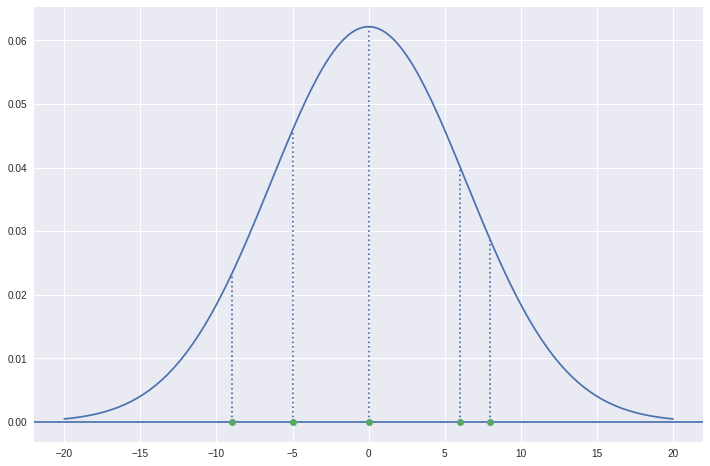

In [7]:
x_range = np.linspace(-20, 20, 200)

plot_normal(x_range, mu, sigma)
plt.axhline(y=0)

plt.vlines(samples, ymin=0, ymax=norm.pdf(samples, mu, sigma), linestyle=':')

plt.plot(samples, [0]*samples.shape[0], 'o', zorder=10, clip_on=False);

Thus, this is the most likely normal distribution from which the five sample points were drawn out.

## References

https://medium.com/@rrfd/what-is-maximum-likelihood-estimation-examples-in-python-791153818030

https://towardsdatascience.com/maximum-likelihood-estimation-how-it-works-and-implementing-in-python-b0eb2efb360f

https://youtu.be/Dn6b9fCIUpM